/home/vicky/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Loading annotated data...



Cell type distribution:
cell_type
Stressed Epithelial         1638
Mature Enterocytes          1234
Mature Colonocytes          1112
Goblet cells                1022
T lymphocytes                910
Inflammatory Enterocytes     795
Early Progenitors            752
Enterocytes (UC-noninfl)     626
Colonocytes (UC-noninfl)     534
Inflammatory Stem/TA         464
Immature Enterocytes         454
Inflammatory Progenitors     439
Antigen-presenting Epi       328
Inflammatory Goblet          308
Transit-amplifying           253
BEST4+ Enterocytes           232
Mast cells                    34
Name: count, dtype: int64



Saved: ../figures/17_cell_type_annotations.png


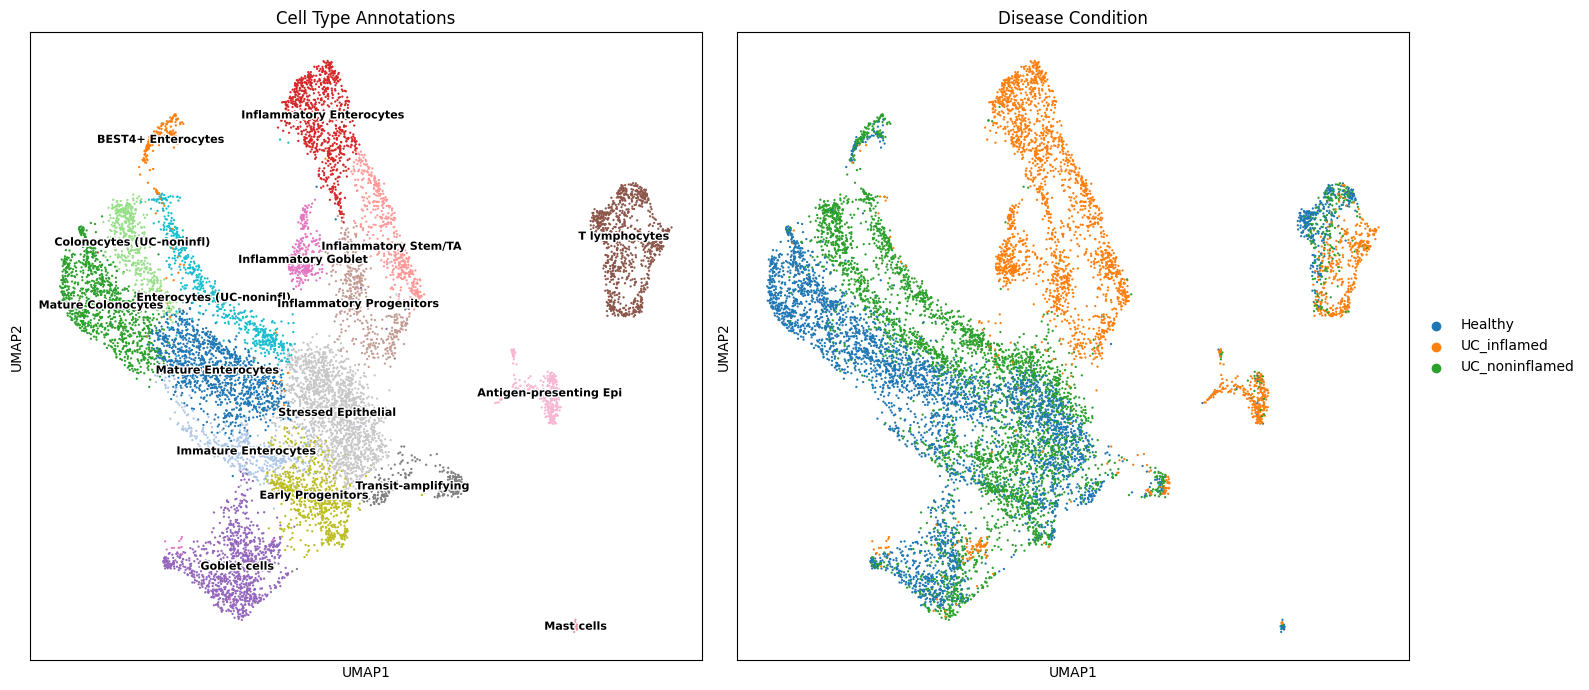


CELL TYPE COMPOSITION BY CONDITION

Percentage of each cell type per condition:
condition                 Healthy  UC_inflamed  UC_noninflamed
cell_type                                                     
Stressed Epithelial          19.5          0.6            19.4
Mature Enterocytes           19.2          0.0            10.2
Mature Colonocytes           24.9          0.1             1.3
Goblet cells                 13.9          2.6             8.8
T lymphocytes                 7.4         13.7             5.2
Inflammatory Enterocytes      0.0         28.0             0.1
Early Progenitors             4.8          0.1            13.5
Enterocytes (UC-noninfl)      0.1          0.9            14.6
Colonocytes (UC-noninfl)      0.4          0.0            12.7
Inflammatory Stem/TA          0.0         16.4             0.0
Immature Enterocytes          4.5          0.2             6.4
Inflammatory Progenitors      0.0         14.6             0.6
Antigen-presenting Epi        0.4    


Saved: ../data/processed/GSE116222_annotated.h5ad

ANNOTATION COMPLETE

17 clusters annotated into cell types:

EPITHELIAL - ABSORPTIVE LINEAGE:
  - Mature Enterocytes (healthy)
  - Mature Colonocytes (healthy)  
  - Enterocytes UC-noninflamed
  - Colonocytes UC-noninflamed
  - Immature Enterocytes
  - Inflammatory Enterocytes
  - BEST4+ Enterocytes

EPITHELIAL - SECRETORY LINEAGE:
  - Goblet cells
  - Inflammatory Goblet

EPITHELIAL - STEM/PROGENITOR:
  - Early Progenitors
  - Transit-amplifying
  - Inflammatory Stem/TA
  - Inflammatory Progenitors

EPITHELIAL - SPECIAL:
  - Antigen-presenting Epithelial
  - Stressed Epithelial

NON-EPITHELIAL (contamination):
  - T lymphocytes
  - Mast cells

Next: Week 5 - Differential Expression Analysis
  Compare gene expression between conditions within cell types



In [1]:
#!/usr/bin/env python3
"""
Week 4 Part 2: Apply Cell Type Annotations
==========================================

Based on marker analysis, assign cell type labels to clusters.
"""

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
PROCESSED_DIR = Path("../data/processed")
FIGURES_DIR = Path("../figures")

# Load data
print("Loading annotated data...")
adata = sc.read_h5ad(PROCESSED_DIR / "GSE116222_annotated.h5ad")

# ==============================================================================
# Define Cluster Annotations
# ==============================================================================

# Based on marker expression analysis
ANNOTATIONS = {
    '0': 'Stressed Epithelial',      # High ribosomal - stress response
    '1': 'Mature Enterocytes',        # CA1, SELENBP1 - healthy-enriched
    '2': 'Mature Colonocytes',        # SLC26A3, AQP8 - healthy-enriched
    '3': 'Goblet cells',              # TFF3, MUC2, SPINK4
    '4': 'T lymphocytes',             # PTPRC, CD7 - immune contamination
    '5': 'Inflammatory Enterocytes',  # LCN2, CEACAM5 - 99% inflamed
    '6': 'Early Progenitors',         # LEFTY1, GMNN
    '7': 'Enterocytes (UC-noninfl)',  # CA1, AMN - non-inflamed specific
    '8': 'Colonocytes (UC-noninfl)',  # GUCA2A, AQP8 - non-inflamed specific
    '9': 'Inflammatory Stem/TA',      # LCN2, OLFM4, HLA-DRA - inflamed
    '10': 'Immature Enterocytes',     # ADH1C, metabolic genes
    '11': 'Inflammatory Progenitors', # LCN2, NUPR1, GPX2 - inflamed
    '12': 'Antigen-presenting Epi',   # CD74, HLA-DRA - MHC-II high
    '13': 'Inflammatory Goblet',      # ITLN1, SPINK4, MUC2 - inflamed
    '14': 'Transit-amplifying',       # STMN1, HMGN2 - cycling
    '15': 'BEST4+ Enterocytes',       # CA7, BEST4, OTOP2
    '16': 'Mast cells',               # TPSAB1, TPSB2, CPA3
}

# Broader categories for some analyses
CELL_TYPE_BROAD = {
    '0': 'Epithelial (stressed)',
    '1': 'Enterocytes',
    '2': 'Colonocytes', 
    '3': 'Goblet cells',
    '4': 'Immune (T cells)',
    '5': 'Enterocytes (inflammatory)',
    '6': 'Progenitors',
    '7': 'Enterocytes',
    '8': 'Colonocytes',
    '9': 'Progenitors (inflammatory)',
    '10': 'Enterocytes',
    '11': 'Progenitors (inflammatory)',
    '12': 'Epithelial (antigen-presenting)',
    '13': 'Goblet cells (inflammatory)',
    '14': 'Transit-amplifying',
    '15': 'BEST4+ Enterocytes',
    '16': 'Immune (Mast cells)',
}

# Apply annotations
adata.obs['cell_type'] = adata.obs['leiden'].map(ANNOTATIONS)
adata.obs['cell_type_broad'] = adata.obs['leiden'].map(CELL_TYPE_BROAD)

print("\nCell type distribution:")
print(adata.obs['cell_type'].value_counts())

# ==============================================================================
# Visualization: UMAP with Cell Type Labels
# ==============================================================================

# Define colors for cell types
cell_type_colors = {
    'Mature Enterocytes': '#1f77b4',
    'Mature Colonocytes': '#2ca02c',
    'Enterocytes (UC-noninfl)': '#17becf',
    'Colonocytes (UC-noninfl)': '#98df8a',
    'Immature Enterocytes': '#aec7e8',
    'Inflammatory Enterocytes': '#d62728',
    'BEST4+ Enterocytes': '#ff7f0e',
    'Goblet cells': '#9467bd',
    'Inflammatory Goblet': '#e377c2',
    'Early Progenitors': '#bcbd22',
    'Transit-amplifying': '#7f7f7f',
    'Inflammatory Stem/TA': '#ff9896',
    'Inflammatory Progenitors': '#c49c94',
    'Antigen-presenting Epi': '#f7b6d2',
    'Stressed Epithelial': '#c7c7c7',
    'T lymphocytes': '#8c564b',
    'Mast cells': '#e7969c',
}

# Set colors
adata.uns['cell_type_colors'] = [cell_type_colors.get(ct, '#333333') 
                                   for ct in adata.obs['cell_type'].cat.categories]

# Create UMAP with annotations
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Panel A: Cell types
sc.pl.umap(adata, color='cell_type', ax=axes[0], show=False,
           title='Cell Type Annotations', legend_loc='on data',
           legend_fontsize=8, legend_fontoutline=2)

# Panel B: By condition for reference
sc.pl.umap(adata, color='condition', ax=axes[1], show=False,
           title='Disease Condition')

plt.tight_layout()
plt.savefig(FIGURES_DIR / "17_cell_type_annotations.png", dpi=150, bbox_inches='tight')
print(f"\nSaved: {FIGURES_DIR}/17_cell_type_annotations.png")
plt.show()

# ==============================================================================
# Summary Table: Cell Types by Condition
# ==============================================================================

print("\n" + "="*70)
print("CELL TYPE COMPOSITION BY CONDITION")
print("="*70)

# Create cross-tabulation
crosstab = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'], 
                       normalize='columns') * 100

print("\nPercentage of each cell type per condition:")
print(crosstab.round(1).to_string())

# Save crosstab
crosstab.to_csv(Path("../results") / "cell_type_by_condition.csv")

# ==============================================================================
# Summary: Key Findings
# ==============================================================================

print("\n" + "="*70)
print("KEY ANNOTATION FINDINGS")
print("="*70)

# Inflammation-specific cells
inflamed_mask = adata.obs['condition'] == 'UC_inflamed'
print("\n1. INFLAMMATION-SPECIFIC CELL TYPES:")
for ct in ['Inflammatory Enterocytes', 'Inflammatory Stem/TA', 
           'Inflammatory Progenitors', 'Inflammatory Goblet']:
    ct_mask = adata.obs['cell_type'] == ct
    if ct_mask.sum() > 0:
        pct_inflamed = (ct_mask & inflamed_mask).sum() / ct_mask.sum() * 100
        print(f"   {ct}: {pct_inflamed:.1f}% from inflamed tissue ({ct_mask.sum()} cells)")

# Healthy-enriched cells
healthy_mask = adata.obs['condition'] == 'Healthy'
print("\n2. HEALTHY-ENRICHED CELL TYPES:")
for ct in ['Mature Enterocytes', 'Mature Colonocytes', 'BEST4+ Enterocytes']:
    ct_mask = adata.obs['cell_type'] == ct
    if ct_mask.sum() > 0:
        pct_healthy = (ct_mask & healthy_mask).sum() / ct_mask.sum() * 100
        print(f"   {ct}: {pct_healthy:.1f}% from healthy tissue ({ct_mask.sum()} cells)")

# Non-inflamed specific
noninfl_mask = adata.obs['condition'] == 'UC_noninflamed'
print("\n3. NON-INFLAMED UC SPECIFIC:")
for ct in ['Enterocytes (UC-noninfl)', 'Colonocytes (UC-noninfl)']:
    ct_mask = adata.obs['cell_type'] == ct
    if ct_mask.sum() > 0:
        pct_noninfl = (ct_mask & noninfl_mask).sum() / ct_mask.sum() * 100
        print(f"   {ct}: {pct_noninfl:.1f}% from non-inflamed tissue ({ct_mask.sum()} cells)")

# Immune cells (contamination)
print("\n4. IMMUNE CELL CONTAMINATION:")
for ct in ['T lymphocytes', 'Mast cells']:
    ct_mask = adata.obs['cell_type'] == ct
    if ct_mask.sum() > 0:
        print(f"   {ct}: {ct_mask.sum()} cells (consider excluding from epithelial analyses)")

# ==============================================================================
# Save Annotated Data
# ==============================================================================

adata.write_h5ad(PROCESSED_DIR / "GSE116222_annotated.h5ad")
print(f"\nSaved: {PROCESSED_DIR}/GSE116222_annotated.h5ad")

print("""
============================================================
ANNOTATION COMPLETE
============================================================

17 clusters annotated into cell types:

EPITHELIAL - ABSORPTIVE LINEAGE:
  - Mature Enterocytes (healthy)
  - Mature Colonocytes (healthy)  
  - Enterocytes UC-noninflamed
  - Colonocytes UC-noninflamed
  - Immature Enterocytes
  - Inflammatory Enterocytes
  - BEST4+ Enterocytes

EPITHELIAL - SECRETORY LINEAGE:
  - Goblet cells
  - Inflammatory Goblet

EPITHELIAL - STEM/PROGENITOR:
  - Early Progenitors
  - Transit-amplifying
  - Inflammatory Stem/TA
  - Inflammatory Progenitors

EPITHELIAL - SPECIAL:
  - Antigen-presenting Epithelial
  - Stressed Epithelial

NON-EPITHELIAL (contamination):
  - T lymphocytes
  - Mast cells

Next: Week 5 - Differential Expression Analysis
  Compare gene expression between conditions within cell types
""")